# Корреляция и регрессия



Корреляционный и регрессионный анализ изучают статистические связи между переменными

- Корреляционный - Существует ли связь между явлениями (не причинно-следственная)? Насколько сильная связь между явлениями?
- Регрессионный - Какой характер связи между явлениями? Построение и исследование регрессионной модели.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [16]:
 feature_names = ['CRIM',  'ZN','INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD' ,'TAX' , 'PTRATIO', 'B', 'LSTAT']

In [17]:
# добавляем target в сами данные
df = pd.DataFrame(data, columns=feature_names)
df['MEDV'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США. Она была получена из архива StatLib и широко использовалась в литературе для оценки алгоритмов.

- CRIM - уровень преступности на душу населения
- ZN - доля земли под жилую застройку,
- INDUS - доля акров, не относящихся к розничной торговле.
- CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота
- RM - среднее количество комнат в доме
- AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- TAX - полная ставка налога на имущество за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
- LSTAT - % более населения низкого соц статуса
- MEDV - Средняя стоимость домов в 1000 долларов

## Корреляция

<Axes: xlabel='CRIM', ylabel='MEDV'>

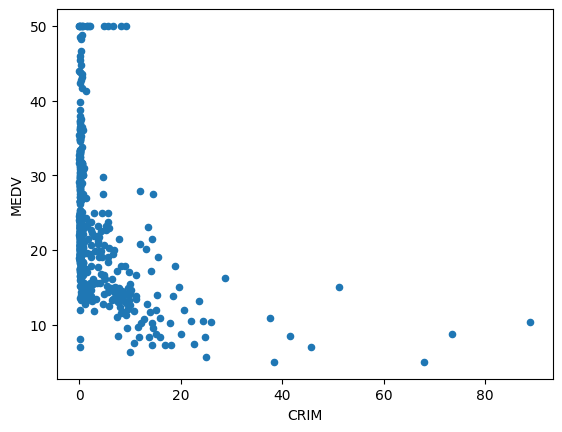

In [18]:
# визуализируем взаимосвязь преступности и цены дома
df.plot(kind='scatter', x='CRIM', y='MEDV')

In [19]:
# можем использовать pairplot для изучения взаимосвязи между множеством признаков
# sns.pairplot(df, kind='reg')

<Axes: xlabel='LSTAT', ylabel='RM'>

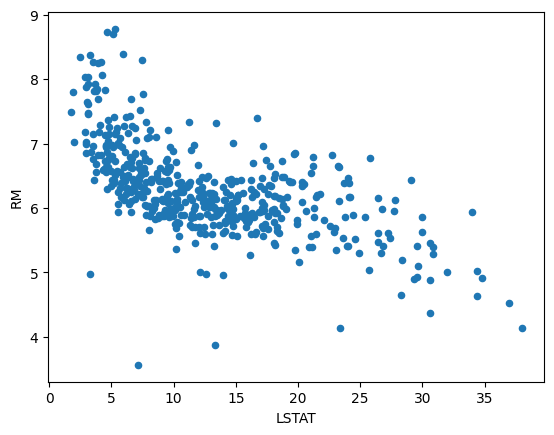

In [20]:
# изучаем взаимосвязь между населением низкого соц. статуса и количеством комнат в доме
df.plot(kind='scatter', x='LSTAT', y='RM')

<Axes: xlabel='RM', ylabel='MEDV'>

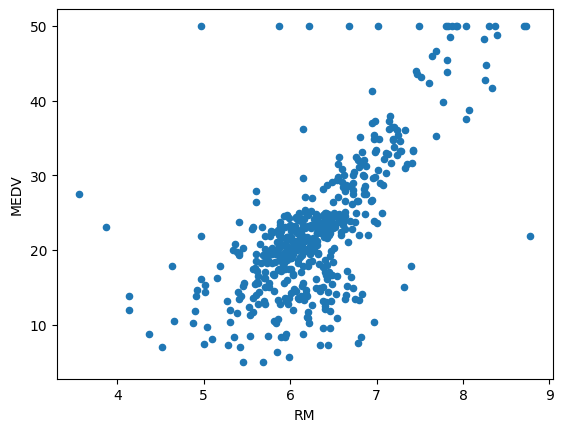

In [21]:
# изучаем взаимосвязь между ценой и количеством комнат в доме
df.plot(kind='scatter', x='RM', y='MEDV')

In [22]:
# считаем коэф. корреляции Пирсона
df[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [23]:
# считаем коэф. корреляции Спирмана
df[['RM', 'MEDV']].corr(method='spearman')

,RM,MEDV
RM,1.000000,0.633576
MEDV,0.633576,1.000000


In [24]:
# считаем коэф. корреляции Кенделла
df[['RM', 'MEDV']].corr(method='kendall')

,RM,MEDV
RM,1.000000,0.482829
MEDV,0.482829,1.000000


In [25]:
# можем посчитать коэффициенты корреляции между всеми показателями
# матрица кореляций для всего датасета
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

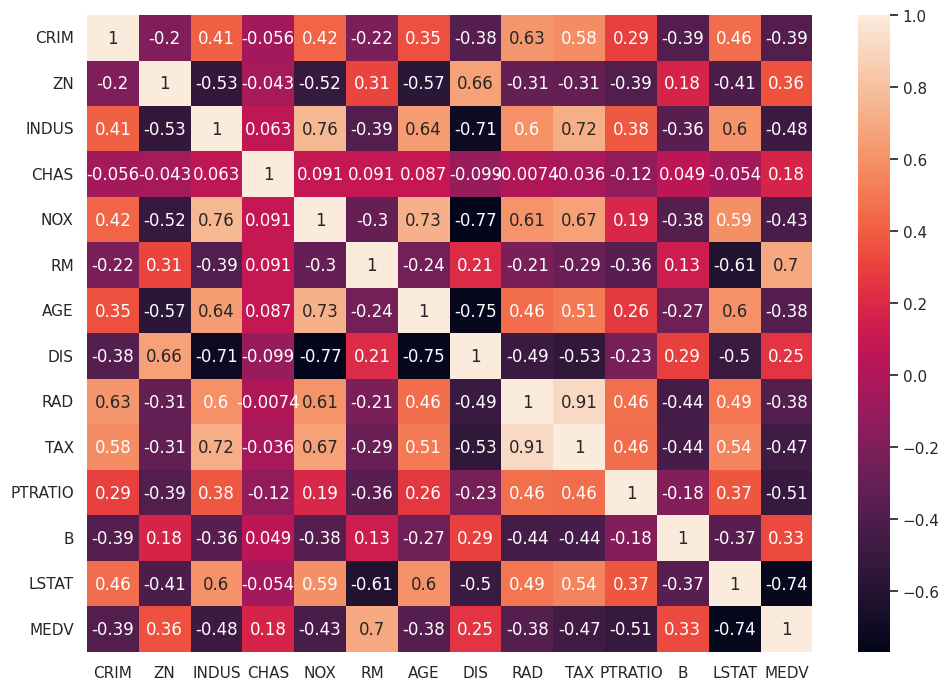

In [26]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True)

## Регрессия

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
X = df[['CRIM', 'AGE', 'RAD', 'RM', 'CHAS']]
y = df['MEDV']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
X_train.shape

(354, 5)

In [31]:
X_test.shape

(152, 5)

In [32]:
y_train.shape

(354,)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [34]:
model.coef_

array([-0.14096091, -0.04481824, -0.13940635,  7.73216686,  5.60152278])

In [35]:
model.intercept_

-21.418448522601217

In [36]:
# y = -0.429 * x + 24.5

In [37]:
y_pred = model.predict(X_test)
y_pred

array([23.71195083, 34.39695654, 19.84253296, 24.55701816, 19.09342427,
       23.08152472, 19.97821959, 21.52633137, 18.76519404, 20.74324042,
       25.28061351, 20.43459365, -0.75277505, 23.6566854 , 18.64971123,
       25.52158083, 19.452677  ,  6.46645781, 37.47860973, 17.32065368,
       25.65866514, 26.69392027, 17.82099884, 26.31455239, 16.41410418,
       11.78705692, 21.65109785, 21.69937127, 25.55681129, 19.34328925,
       16.98212583, 25.20380492, 24.62931288, 11.86567775, 16.79330434,
       17.3099132 , 31.11611631, 21.18469174, 27.84539829, 26.00589268,
       16.1134207 , 27.40564331, 38.71162085, 19.60925038, 24.95096517,
       14.08090795, 17.68492893, 27.33299923, 18.54233046, 26.35810203,
       20.61511952, 30.08979725, 21.23133212, 27.10468796, 33.21017732,
       21.19732574, 18.041584  , 29.81895754, 25.40573971, 17.7712917 ,
       27.78826978, 32.95162983, 27.10607389, 18.45713011, 27.27367061,
       20.40290636, 19.61388758, 25.30373651, 28.17604047, 16.84

In [38]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

In [39]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5484147255237969

In [50]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

In [ ]:
# Альтернативный способ из statsmodel

In [51]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [53]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

In [54]:
X_const

,const,CRIM,AGE,RAD,RM,CHAS
5,1.0,0.02985,58.7,3.0,6.430,0.0
116,1.0,0.13158,72.5,6.0,6.176,0.0
45,1.0,0.17142,33.8,3.0,5.682,0.0
16,1.0,1.05393,29.3,4.0,5.935,0.0
468,1.0,15.57570,71.0,24.0,5.926,0.0
...,...,...,...,...,...,...
106,1.0,0.17120,91.9,5.0,5.836,0.0
270,1.0,0.29916,42.1,3.0,5.856,0.0
348,1.0,0.01501,29.7,4.0,6.635,0.0
435,1.0,11.16040,94.6,24.0,6.629,0.0


In [55]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     101.1
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.33e-65
Time:                        20:35:21   Log-Likelihood:                -1135.8
No. Observations:                 354   AIC:                             2284.
Df Residuals:                     348   BIC:                             2307.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.4184      3.277     -6.535      0.0

In [56]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const   -21.418449
CRIM     -0.140961
AGE      -0.044818
RAD      -0.139406
RM        7.732167
CHAS      5.601523
dtype: float64
R2:  0.592176717410185


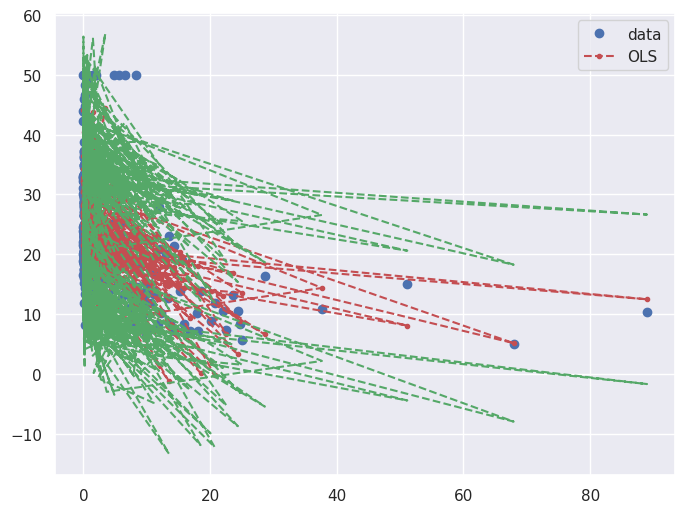

In [57]:
prstd, iv_l, iv_u = wls_prediction_std(results)
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

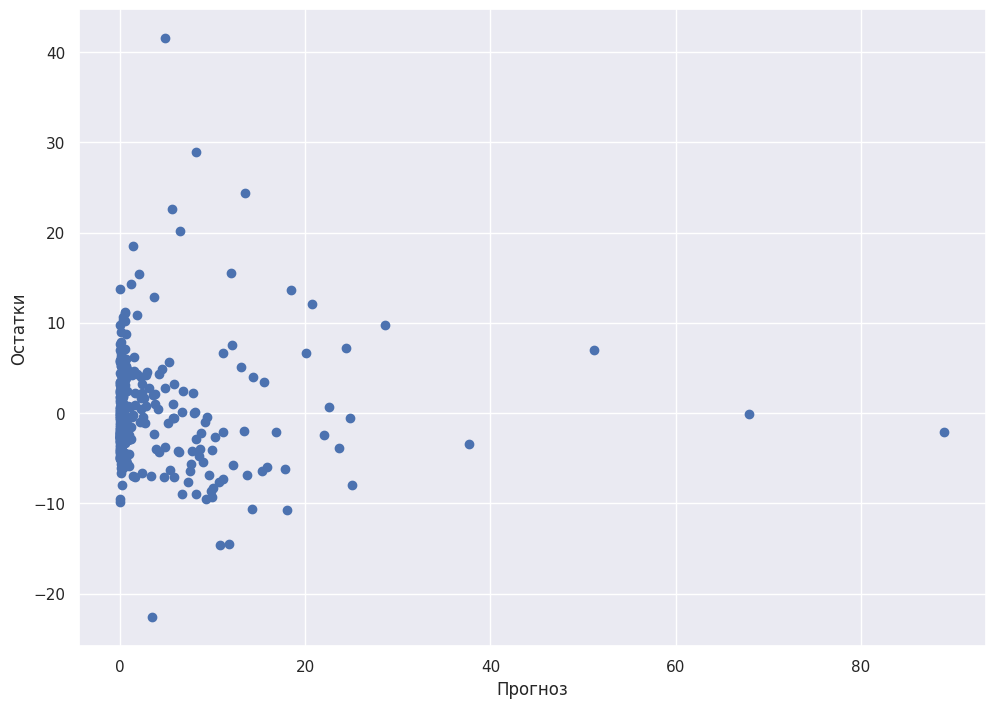

In [58]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

(array([  1.,   0.,   2.,   3.,  21.,  57., 116.,  79.,  40.,  14.,   9.,
          6.,   1.,   1.,   2.,   0.,   1.,   0.,   0.,   1.]),
 array([-22.62057705, -19.41416753, -16.20775802, -13.0013485 ,
         -9.79493898,  -6.58852946,  -3.38211995,  -0.17571043,
          3.03069909,   6.2371086 ,   9.44351812,  12.64992764,
         15.85633715,  19.06274667,  22.26915619,  25.4755657 ,
         28.68197522,  31.88838474,  35.09479425,  38.30120377,
         41.50761329]),
 <BarContainer object of 20 artists>)

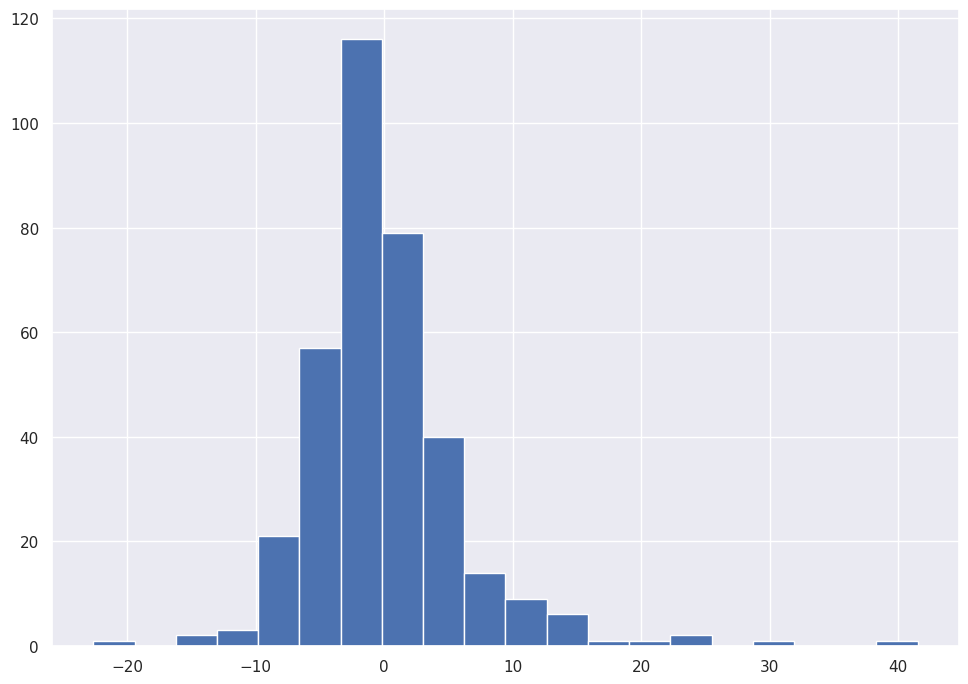

In [59]:
plt.hist(results.resid, bins=20)